# `DBSCAN` app

* [Dani Arribas-bel](http://darribas.org) [[@darribas](http://twitter.com/darribas)]

This notebook presents an interactive exploration of the `DBSCAN` algorithm. The intuition of the algorithm is very simple: a cluster is considered to be a group of at least `m` points where each of the is at maximum within `r` distance of another point in the cluster. Once, `m` and `r` are pre-defined by the user, the algorithm is very fast to compute and has been known to identify irregular clusters very well (e.g. [Everitt et al., 2011](http://onlinelibrary.wiley.com/book/10.1002/9780470977811)). 

This choice of parameters is crucial, so getting a sense of how each of these influences the final outcome of the algorithm is very useful. In this notebook, we will build a simple interactive widget to explore this in a small example.

## Setup

Let us import all pieces we'll need:

In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import dbscan
from ipywidgets import interact, fixed

/home/dani/anaconda/envs/gds/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


And generate a small data set of random points:

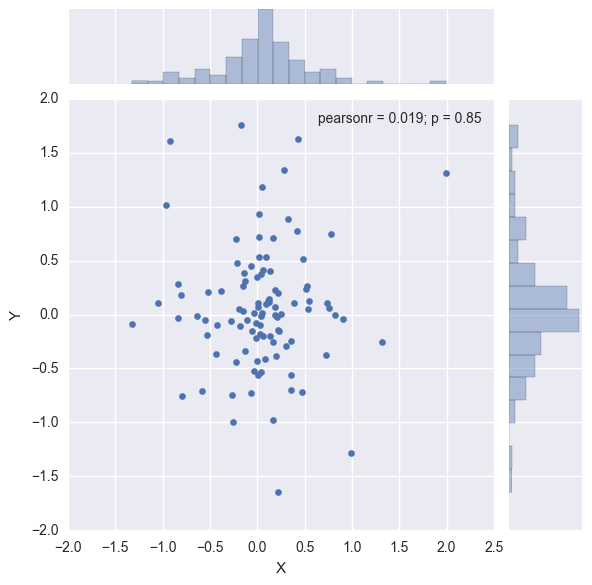

In [2]:
np.random.seed(1234)
xys0 = np.random.random(size=(100, 2))
xys1 = np.random.normal(size=(100, 2))
xys = pd.DataFrame(np.multiply(xys0, xys1), columns=['X', 'Y'])

sns.jointplot('X', 'Y', data = xys);

Now let's get a short function that runs `DBSCAN` on a set of points and plot the output, coloring in red points that are part of a cluster and in grey those considered as noise:

In [3]:
def clusters(xys, r=0.01, minp=10):
    '''
    Obtain clusters in `xys` from `DBSCAN`
    '''
    cos, lbls = dbscan(xys[['X', 'Y']], eps=r, min_samples=minp)
    lbls = pd.Series(lbls)
    f, ax = plt.subplots(1, figsize=(6, 6))
    # Plot noise
    noise = xys.loc[lbls==-1, ['X', 'Y']]
    ax.scatter(noise.X, noise.Y, s=30, c='0.75', marker='.', linewidth=0)
    # Plot clusters
    ci = lbls[lbls!=-1].unique()
    cs = xys.loc[xys.index.difference(noise.index), ['X', 'Y']]
    colors = ['red', 'yellow', 'green', 'blue', 'orange', 'brown']
    for id, c in cs.groupby(lbls[lbls!=-1]):
        ax.scatter(c.X, c.Y, s=80, c=colors[id], marker='.', linewidth=0)
    # Plot cores
    cores = xys.iloc[cos, [0, 1]]
    ax.scatter(cores.X, cores.Y, s=5, c='k', marker='o', linewidth=0.1, edgecolor='w')
    # Style
    ax.set_title("%i different clusters"%(lbls.unique().shape[0]-1))
    plt.show()
    return None

An example of this with a radius of 0.25 and a minimum of 5 points:

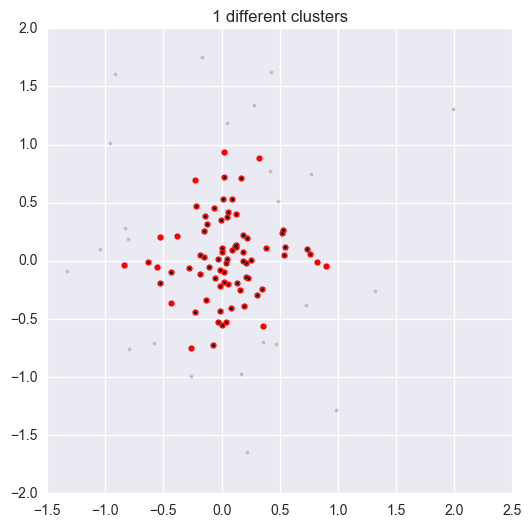

In [4]:
clusters(xys, r=0.25, minp=5)

And if we want to explore this further, we turn the function into an interactive widget where we can easily modigy both parameters:

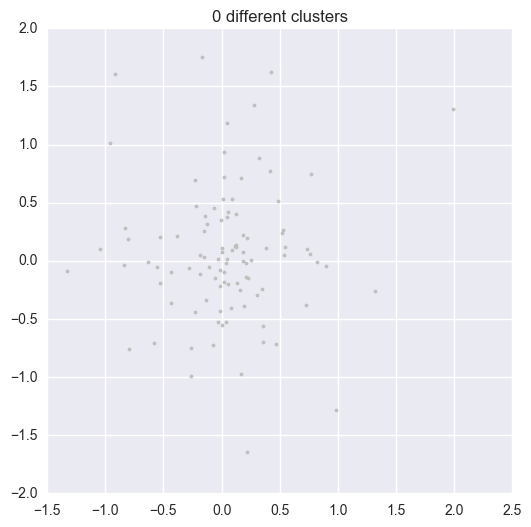

In [5]:
interact(clusters, xys=fixed(xys), r=(0.1, 0.5, 0.05), minp=[3, 10]);

---

<a rel="license" href="http://creativecommons.org/licenses/by-nc-sa/4.0/"><img alt="Creative Commons License" style="border-width:0" src="https://i.creativecommons.org/l/by-nc-sa/4.0/88x31.png" /></a><br />This work is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by-nc-sa/4.0/">Creative Commons Attribution-NonCommercial-ShareAlike 4.0 International License</a>.